# Abstract:

The abstract should be 1-3 sentences at most. Describe a) what you measured, b) how you measured it and c) the result you found. Not a great deal of detail, but enough to answer these basic questions. Also include the result from your analysis. So for example in this report we could say: The measured time constant was 3.676 +/- 0.031 msec.

# Description

In the description you would describe the circuit you 
built/designed/tested this week and any important features that were 
investigated. For example, in the first week'd lab you might say:

This project was meant to familiarize us with the Arduino IDE
and to remind us of the behavior of "RC" circuits. When the charging voltage is suddenly removed from a capacitor the charge "decays"
through some resistance with an exponential time dependence:

\begin{equation}
V(t) = V_0 e^{-t/RC}
\end{equation}

We used an Arduino microcontroller to control the charging and discharging
of a capacitor as well as to record the voltage across the capacitor
as the voltage dropped over time.

# Schematic, Background Discussion

You should always include a schematic describing the circuit you actually built.

If the reader will need any background information or further discussion to explain the experiment, this is a good place to put that.

The circuit was constructed according to the following schematic:

![Arduino RC](arduino_rc.png)



The resitance in the sample circuit was $1\,k\Omega$ and the capacitance was $4\,\mu F$. You may have different values for resistance and capacitance in your circuit.

# Circuit Function, including code + data

We programmed the Arduino with the following "C" program:
 
    // Pin 13 has an LED connected on most Arduino boards.
    // give it a name:

    #define LED 13
    #define OUTPWM 3          // send PWM output to pin 3
    #define IN_ANALOG 0       // which analog pin are we reading?
    #define NUMLOOPS 40       // how much data to collect?
    #define STARTUP_DELAY 500 // how long to hold voltage high
    #define DECAY_DELAY   10  // how long to measure
    #define LOOP_DELAY 500    // how many millis to delay each time

    int data[NUMLOOPS];  // data from analog input

    short flag=0;        // flag to check for first time

    // the setup routine runs once when you press reset:

    void setup()
    {
        Serial.begin(9600);       // start serial port at 9600 bps:
        pinMode(LED, OUTPUT);     // digital sensor is on digital pin 2
        pinMode(OUTPWM, OUTPUT);  // set PWM output pin for output
        flag=0;
    }

    // the loop routine runs over and over again forever:
    void loop() {
        if (flag==0) {
            analogWrite(OUTPWM, 255);  // set PWM pin high 100% of the time for a while
            delay(STARTUP_DELAY);      // wait for cap to charge
            analogWrite(OUTPWM, 0);    // now set PWM pin low 100% of the time, and measure discharge
            collectData((int)((1000.0*DECAY_DELAY)/NUMLOOPS)); // grab the discharge V vs. t
            flag=1;                    // we're finished collecting data, set flag to 1
        }
        else if (flag==1) {            // we have data
            printData();               // send it to the computer
            flag=2;                    // finished sending, set flag to 2
        }
        else {
            digitalWrite(LED, HIGH);   // Toggle LED to indicate that the program has finished.
            delay(LOOP_DELAY);         // wait for LOOP_DELAY seconds
            digitalWrite(LED, LOW);    // turn the LED off by making the voltage LOW
            delay(LOOP_DELAY);         // wait for LOOP_DELAY seconds
        }
    }

    void collectData(int delayMicros) {         // collectData read the analog port (analog pin 0)
        for (int i=0; i<NUMLOOPS; i++) {        // and stores the results in the "data" array.
            data[i]=analogRead(IN_ANALOG);      // grab one voltage and store it
            delayMicroseconds(delayMicros);     // wait for a bit between samples
        }
    }

    void printData() {
        Serial.println("time,voltage");
        for (int i=0; i<NUMLOOPS; i++) {
            Serial.print(((1.0*i*DECAY_DELAY)/(NUMLOOPS)),4);  // convert times to milliseconds
            Serial.print(',');                                 // make a comma separated value file
            Serial.println((5.0*data[i])/1023.0,4);            // convert A/D values to "volts".
        }
    }

Data
=====

The `printData` function sent the "CSV" strings to the computer over the serial monitor. The code below reads in the CSV data and loads it into a 'pandas' (Python Data Analysis) table. You can use Excel, or whatever if you like. If you want to use python, I'd be happy to help you get started.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx')
data

,time,voltage
0,0.00,4.8680
1,0.25,4.5161
2,0.50,4.1935
3,0.75,3.8954
4,1.00,3.6266
5,1.25,3.3675
6,1.50,3.1329
7,1.75,2.9130
8,2.00,2.7126
9,2.25,2.5269


# Results (including analysis and stats exercises)

The idea of this section is to tell the story of what you learned from the data you collected. Use whatever tools you need to make it clear how you analyzed the data to make whatever claims you can make. For example from the first week's experiment you might say the following:

Looking at the raw data we can see an exponential decay:

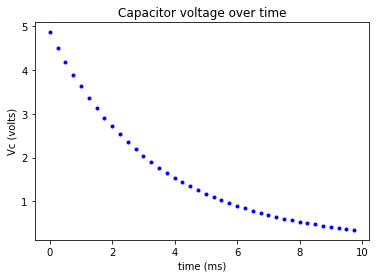

In [3]:
#
# let's plot the raw data to see how it looks
#

plt.title("Capacitor voltage over time")
plt.xlabel("time (ms)")
plt.ylabel("Vc (volts)")
plt.plot(data.time.values, data.voltage.values, 'b.')

We can also take the natural log (just `log` in python) and estimate the time constant since the voltage is exponential:

\begin{equation}
V(t) = V_0 e^{-t/RC}
\end{equation}

we can take the "ln" of both sides to produce a linear relationship:

\begin{equation}
ln(V(t)) = ln(V_0) - \frac{t}{RC}
\end{equation}

therefore the slope should be ${-1/RC}$. 

Slope: -0.2720 +/- 0.0023 (per msec)
Time constant: 3.676 +/- 0.031 msec  (4 msec theoretical)


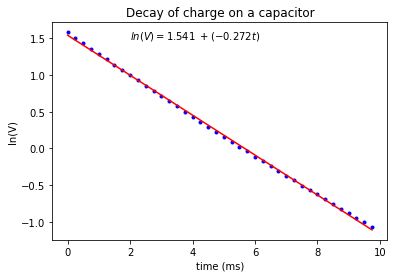

In [4]:
#
# This code uses scipy.optimize to fit the collected data, you can use excel or whatever
#

from scipy.optimize import curve_fit

def fLinear(x, m, b):
    return m*x + b

popt, pcov = curve_fit(fLinear, data.time.values, np.log(data.voltage.values+0.001))

m=popt[0]          # slope
b=popt[1]          # int

dm, db = np.sqrt(np.diag(pcov))

ystar=fLinear(data.time.values, m, b)

print("Slope: %4.4f +/- %4.4f (per msec)" % (m, 2*dm))
print("Time constant: %4.3f +/- %4.3f msec  (4 msec theoretical)" % (abs(1/m), abs(2*dm/m**2)))

plt.title("Decay of charge on a capacitor")
plt.ylabel("ln(V)")
plt.xlabel("time (ms)")
plt.plot(data.time.values, np.log(data.voltage.values+0.001), 'b.')
plt.text(2, 1.5, "$ln(V) = %6.3f\  + (%6.3f t)$" % (b, m))
plt.plot(data.time.values, ystar,'r-')

Then go on to explain the significance of the slope/intercept or whatever else you can from the analysis of the data you collected. For example you can compare the measured to the expected slope:

So, the measured slope was $m=-0.272$ per millisecond giving a time constant of, but we expected a slope of:

\begin{equation}
m =\frac{-1}{RC} = \frac{-1}{1k\Omega\cdot 4\mu F} = -0.250\,{\rm ms^{-1}}
\end{equation}

Conclusion
===========

Be sure to answer any questions posed in the project description (handout) and give some kind of final assessment of the project overall. (Did it meet expectations, goals, etc.?) For example you might say:

Since the expected slope (-0.25 per millisecond) is withing 10% of the measured value (-0.272 per millisecond) and the capacitance is not a high-precision component this seems an acceptable variation.


